In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
from itertools import combinations
from sklearn.cluster import KMeans


In [44]:
with open('./data/2016_q1_newman-neighbours_kcore.pickle', 'rb') as picklefile:
    nbrs_nm = pickle.load(picklefile)

In [45]:
with open('./data/2016_q1_newman-weights_kcore.pickle', 'rb') as picklefile:
    weights_nm = pickle.load(picklefile)

In [48]:
with open('./data/2016_q1_cci-neighbours_kcore.pickle', 'rb') as picklefile:
    nbrs_cii = pickle.load(picklefile)

In [49]:
with open('./data/2016_q1_cci-weights_kcore.pickle', 'rb') as picklefile:
    w_cii = pickle.load(picklefile)

In [46]:
len(weights_nm)

1058308

In [47]:
len(nbrs_nm)

3053

In [50]:
len(w_cii)

529154

In [51]:
len(nbrs_cii)

3053

In [53]:
#change w_ciito dict
weights_cii = {}
for i in xrange(len(w_cii)):    
    weights_cii[w_cii[i][0]] = w_cii[i][1]
    

In [54]:
#map ids to 0-3052
keys = range(len(nbrs_nm))
values = sorted(nbrs_nm.keys())
ids = dict(zip(keys,values))


#### Newman Graph

In [57]:
#weighted adjacency matrix
A = np.zeros((len(ids),len(ids)))
w = set(weights_nm.keys())
pairs = combinations(keys, 2) 
for u,v in pairs:  #u<v
    if ((ids[u],ids[v])in w)or((ids[v],ids[u])in w):
        A[u,v] = weights_nm[(ids[u],ids[v])]
        A[v,u] = weights_nm[(ids[u],ids[v])]
    

In [58]:
#weighted diagonal matrix
D = np.zeros((len(ids),len(ids)))
for i in xrange(len(ids)):
    D[i,i] = np.sum(A,axis = 0)[i]


In [59]:
#compute eigenvalues
L = D - A
L_n = np.dot(np.linalg.inv(D),L)
eigen_val,eigen_vec = np.linalg.eigh(L_n)

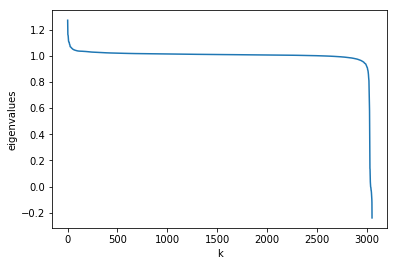

In [60]:
#plot eigen gap to determine number of clusters
plt.plot(range(1,len(ids)+1),sorted(eigen_val,reverse=True))
plt.xlabel('k')
plt.ylabel('eigenvalues')
plt.show()

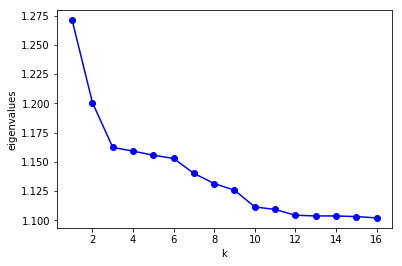

In [61]:
plt.plot(range(1,17),sorted(eigen_val,reverse=True)[0:16],'bo-')
plt.xlabel('k')
plt.ylabel('eigenvalues')
plt.show()
#choose 2 clusters

In [62]:
v2 = eigen_vec[:,1]
c1 = {ids[i]:1 for i in np.where(v2>0)[0]} #nodes in community 1 if v2 > 0
c2 = {ids[i]:2 for i in np.where(v2<0)[0]} #nodes in community 2 if v2 < 0
c2.update(c1)

In [65]:
with open('./data/author_clusters_2016_q1_k25core_newman.pickle', 'wb') as picklefile:
    pickle.dump(c2, picklefile, protocol=2)

In [66]:
len(c2)

3053

#### CII graph

In [77]:
#weighted adjacency matrix
A = np.zeros((len(ids),len(ids)))
w = set(weights_cii.keys())
pairs = combinations(keys, 2) 
for u,v in pairs:  #u<v
    if ((ids[u],ids[v])in w)or((ids[v],ids[u])in w):
        A[u,v] = weights_cii[(ids[u],ids[v])]
        A[v,u] = weights_cii[(ids[u],ids[v])]
    
    

In [78]:
#weighted diagonal matrix
D = np.zeros((len(ids),len(ids)))
for i in xrange(len(ids)):
    D[i,i] = np.sum(A,axis = 0)[i]


In [79]:
#compute eigenvalues
L = D - A
L_n = np.dot(np.linalg.inv(D),L)
eigen_val,eigen_vec = np.linalg.eigh(L_n)

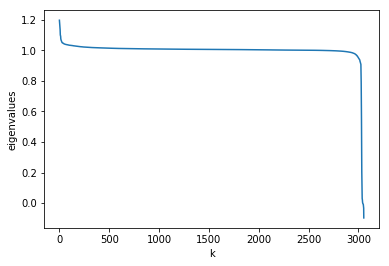

In [80]:
#plot eigen gap to determine number of clusters
plt.plot(range(1,len(ids)+1),sorted(eigen_val,reverse=True))
plt.xlabel('k')
plt.ylabel('eigenvalues')
plt.show()

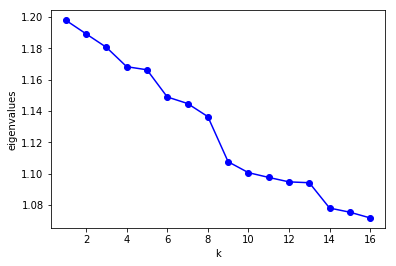

In [81]:
plt.plot(range(1,17),sorted(eigen_val,reverse=True)[0:16],'bo-')
plt.xlabel('k')
plt.ylabel('eigenvalues')
plt.show()
#choose 9 clusters

In [82]:
#k-means clustering
U = eigen_vec[:,:9]
kmeans = KMeans(n_clusters=9, random_state=0).fit(U)
c = kmeans.labels_
cii_c = {ids[i]:kmeans.labels_[i] for i in xrange(len(kmeans.labels_))}

In [83]:
len(cii_c)

3053

In [84]:
with open('./data/author_clusters_2016_q1_k25core_cii.pickle', 'wb') as picklefile:
    pickle.dump(cii_c, picklefile, protocol=2)